# SVM

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
# Import dataframe from JSON file
jsonStr = "features_df.json"
df = pd.read_json(jsonStr, orient ='index')
print(df.tail)

<bound method NDFrame.tail of                                                 class       red     green  \
data/9036/0/9036_idx5_x1051_y2401_class0.png        0  0.813904  0.634866   
data/9036/0/9036_idx5_x2951_y951_class0.png         0  0.886744  0.774951   
data/9036/0/9036_idx5_x3001_y1451_class0.png        0  0.814538  0.619407   
data/9036/0/9036_idx5_x3051_y801_class0.png         0  0.793319  0.489656   
data/9036/0/9036_idx5_x951_y1901_class0.png         0  0.875853  0.726767   
...                                               ...       ...       ...   
data/12905/0/12905_idx5_x651_y2101_class0.png       0  0.819194  0.587933   
data/12905/0/12905_idx5_x701_y2251_class0.png       0  0.686665  0.493617   
data/12905/0/12905_idx5_x2101_y1901_class0.png      0  0.591533  0.428568   
data/12905/0/12905_idx5_x951_y2351_class0.png       0  0.921280  0.880516   
data/12905/0/12905_idx5_x801_y2001_class0.png       0  0.795443  0.618093   

                                             

In [6]:
X = df[['red','blue','green','gray']]
y = df['class']

In [7]:
#using train_test_split for splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100, shuffle=True)
print('########## Train data ##########')
print(X_train)
print(y_train)
print('########## Test data ##########')
print(X_test)
print(y_test)

########## Train data ##########
                                                     red      blue     green  \
data/9036/0/9036_idx5_x2101_y1201_class0.png    0.909578  0.883759  0.842168   
data/13613/1/13613_idx5_x2601_y1701_class1.png  0.828078  0.723991  0.623475   
data/10259/0/10259_idx5_x1851_y651_class0.png   0.862761  0.682154  0.524345   
data/12750/0/12750_idx5_x2751_y1551_class0.png  0.918985  0.801975  0.749438   
data/10292/0/10292_idx5_x1851_y2251_class0.png  0.892902  0.880174  0.843144   
...                                                  ...       ...       ...   
data/10295/1/10295_idx5_x1451_y1801_class1.png  0.581457  0.578761  0.364508   
data/9036/0/9036_idx5_x1001_y2401_class0.png    0.891351  0.838082  0.776424   
data/16165/1/16165_idx5_x1851_y651_class1.png   0.740750  0.703435  0.573735   
data/12951/0/12951_idx5_x2601_y1501_class0.png  0.912944  0.794609  0.720890   
data/13613/0/13613_idx5_x3301_y901_class0.png   0.883931  0.686406  0.597181   

      

## SVM
Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Accuracy Linear Kernel: 0.80575


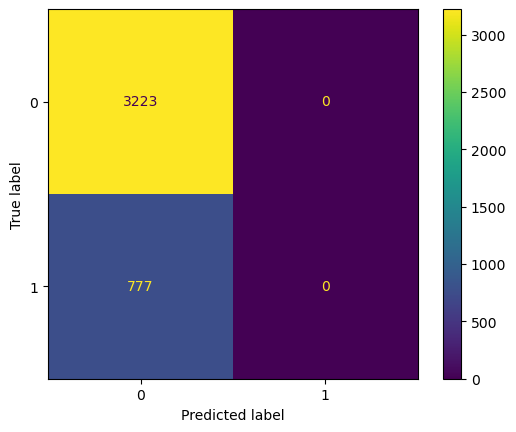

In [33]:
# LINEAR KERNEL SVM
linear = svm.SVC(kernel='linear', C=100, decision_function_shape='ovo').fit(X_train, y_train)

# Accuracy
linear_pred = linear.predict(X_test)
accuracy_lin = linear.score(X_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin)

# Confusion matrix
cm_lin = confusion_matrix(y_test, linear_pred)
ConfusionMatrixDisplay.from_predictions(y_test,linear_pred)

Accuracy Sigmoid Kernel: 0.716


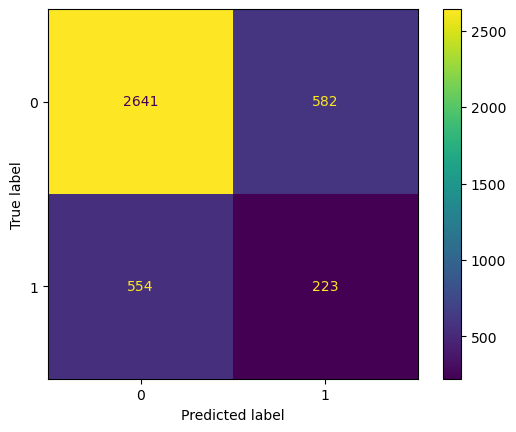

In [38]:
# SIGMOID KERNEL SVM
sig = svm.SVC(kernel='sigmoid', C=100, decision_function_shape='ovo').fit(X_train, y_train)

# Accuracy
sig_pred = sig.predict(X_test)
accuracy_sig = sig.score(X_test, y_test)
print('Accuracy Sigmoid Kernel:', accuracy_sig)

# Confusion matrix
cm_sig = confusion_matrix(y_test, sig_pred)
#print('Confusion matrix linear kernel:\n',cm_sig)
ConfusionMatrixDisplay.from_predictions(y_test,sig_pred)

Accuracy RBF Kernel: 0.824
Confusion matrix linear kernel:
 [[3123  100]
 [ 604  173]]


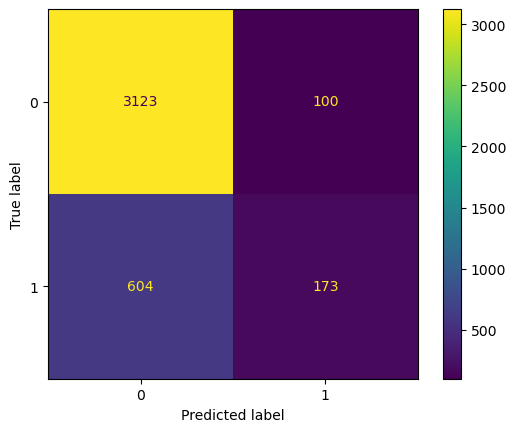

In [35]:
# RBF
rbf = svm.SVC(kernel='rbf', C=100, decision_function_shape='ovo').fit(X_train, y_train)

# Accuracy
rbf_pred = rbf.predict(X_test)
accuracy_rbf = rbf.score(X_test, y_test)
print('Accuracy RBF Kernel:', accuracy_rbf)

# Confusion matrix
cm_rbf = confusion_matrix(y_test, rbf_pred)
ConfusionMatrixDisplay.from_predictions(y_test,rbf_pred)

Accuracy Polynomial Kernel: 0.8245


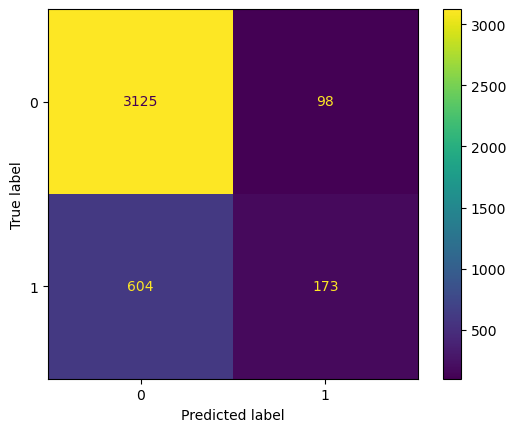

In [32]:
# Polynomial
poly = svm.SVC(kernel='poly', degree=3, gamma='scale', C=100, decision_function_shape='ovo').fit(X_train, y_train)

# Accuracy
poly_pred = poly.predict(X_test)
accuracy_poly = poly.score(X_test, y_test)
print('Accuracy Polynomial Kernel:', accuracy_poly)

# Confusion matrix
cm_poly = confusion_matrix(y_test, poly_pred)
ConfusionMatrixDisplay.from_predictions(y_test,poly_pred)